# Hierarchical divisive clustering

### A naive implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from hierarchical_divisive_clustering import HierarchicalDivisive

### Data

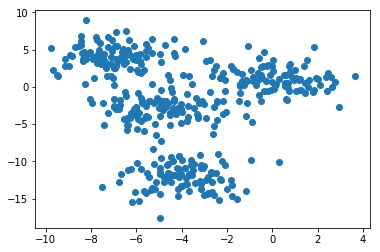

In [2]:
size = 100
# blob 1
x = np.random.normal(-4,1.5,(size))
y = np.random.normal(-12,1.5,(size))
# blob 2
x = np.concatenate((x,np.random.normal(0,1.5,(size))))
y = np.concatenate((y,np.random.normal(1,1.5,(size))))
# blob 3
x = np.concatenate((x,np.random.normal(-7,1.5,(size))))
y = np.concatenate((y,np.random.normal(4,1.5,(size))))
# blob 4
x = np.concatenate((x,np.random.normal(-5,1.5,(size))))
y = np.concatenate((y,np.random.normal(-3,1.5,(size))))

X = np.hstack((x[:,None],y[:,None]))

plt.scatter(X[:,0],X[:,1])
plt.show()

### Divide into clusters

In [3]:
hdc = HierarchicalDivisive()

In [4]:
hdc.fit(X,4)

In [5]:
clusters = hdc.get_clusters()

### Visualize

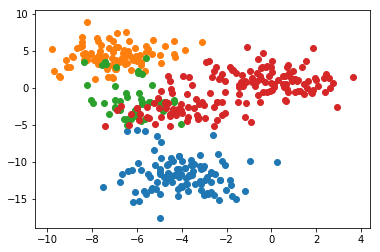

In [6]:
for c in clusters:
    plt.scatter(c[:,0],c[:,1])
plt.show()

**k-means seems to perform better**<br>
**However, this clustering also offer hierarchy**

### Hierarchy

In [7]:
# Hierarchy is stored in the form of a tree
hierarchy = hdc.get_tree()

In [8]:
hierarchy.left.count(),hierarchy.right.count()

(1, 3)

In [9]:
# most distant cluster
a = hierarchy.left.get_data()

In [10]:
hierarchy.right.left.count(),hierarchy.right.right.count()

(1, 2)

In [11]:
# second most distant cluster
b = hierarchy.right.left.get_data()

In [12]:
# the ramaining clusters, and the closest
c = hierarchy.right.right.left.get_data()
d = hierarchy.right.right.right.get_data()

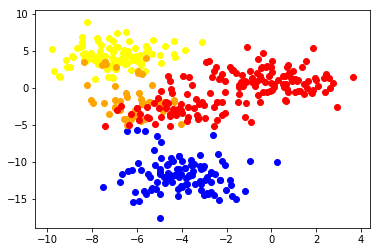

In [14]:
plt.scatter(a[:,0],a[:,1],c='blue')
plt.scatter(b[:,0],b[:,1],c='yellow')
plt.scatter(c[:,0],c[:,1],c='orange')
plt.scatter(d[:,0],d[:,1],c='red')
plt.show()

**Indeed, c and d are the closest, and a is the farthest cluster**

### Joint clusters

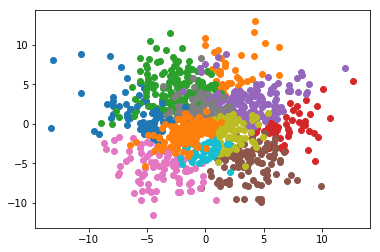

In [35]:
# Generate new data and split it into 6 clusters
size = 1000
x = np.random.normal(0,4,(size))
y = np.random.normal(0,4,(size))
X = np.hstack((x[:,None],y[:,None]))

hdc.fit(X,12)

clusters = hdc.get_clusters()
for c in clusters:
    plt.scatter(c[:,0],c[:,1])
plt.show()

In [36]:
hierarchy = hdc.get_tree()

In [37]:
hierarchy.left.count(),hierarchy.right.count()

(3, 9)

In [38]:
hierarchy.right.left.count(),hierarchy.right.right.count()

(2, 7)

**Plot only the three largest clusters**

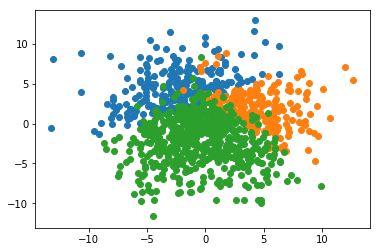

In [40]:
a = hierarchy.left.get_data() # 3 clusters
b = hierarchy.right.left.get_data() # 2 clusters
c = hierarchy.right.right.get_data() # 7 remaining clusters

plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])
plt.scatter(c[:,0],c[:,1])
plt.show()